###Question 1:
Generate a dataset for linear regression with 1000 samples, 5 features and single target.

Visualize the data by plotting the target column against each feature column. Also plot the best fit line in each case.

Hint : search for obtaining regression line using numpy.

In [1]:
#importing needful libraries and functions
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression as mr
from sklearn.linear_model import LinearRegression

In [2]:
#Creating regression dataset
X,y = mr(n_samples=1000,n_features=5,n_targets=1)

In [3]:
print(X.shape)
print(y.shape)

(1000, 5)
(1000,)


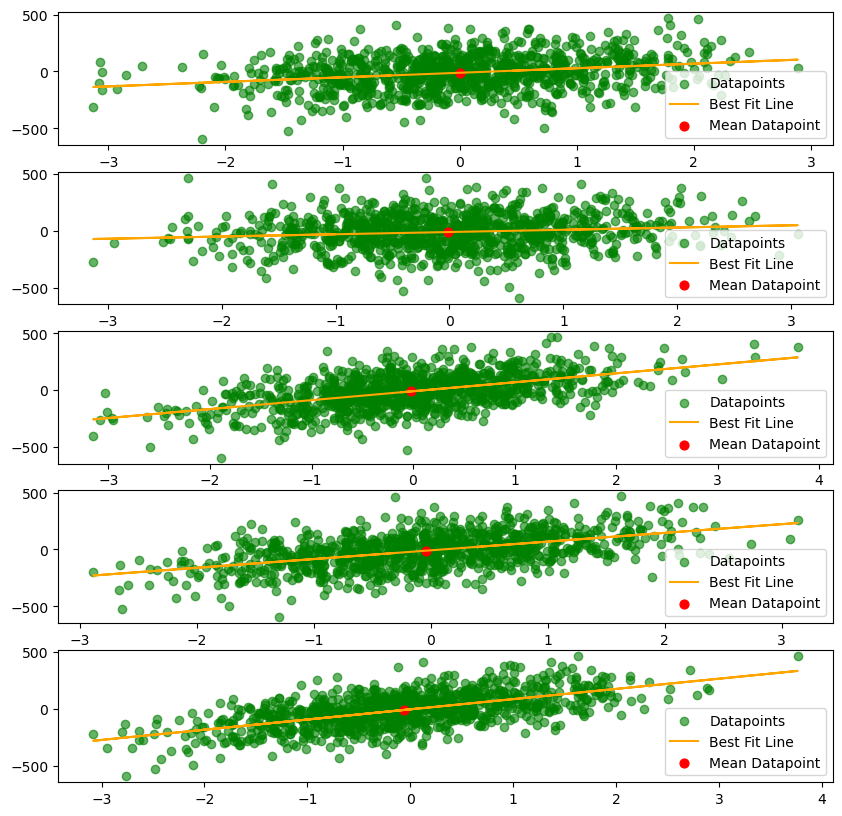

In [4]:
#Creating the plots for each feature, plotting all datapoints and best fit line
fig,ax=plt.subplots(5,1,figsize=(10,10))
for i in range(5):
    plt.subplot(511+i)
    plt.scatter(X[:,i],y,label='Datapoints',alpha=0.6,color='green')
    model = LinearRegression()
    x=np.array(X[:,i])
    y=np.array(y)
    model.fit(x.reshape(-1,1),y)
    mean=sum(x)/len(x)
    best_fit_line = model.predict(x.reshape(-1,1))
    average_point=model.predict(mean.reshape(-1,1))
    plt.plot(x,best_fit_line,label='Best Fit Line',color='orange')
    plt.scatter(mean,average_point.reshape(-1,1),label='Mean Datapoint',color='red',s=40)
    plt.legend()

### Question 2:
Make a classification dataset of 1000 samples with 2 features, 2 classes and 2 clusters per class.
Plot the data.

In [5]:
from sklearn.datasets import make_classification


Text(0, 0.5, 'Feature 2')

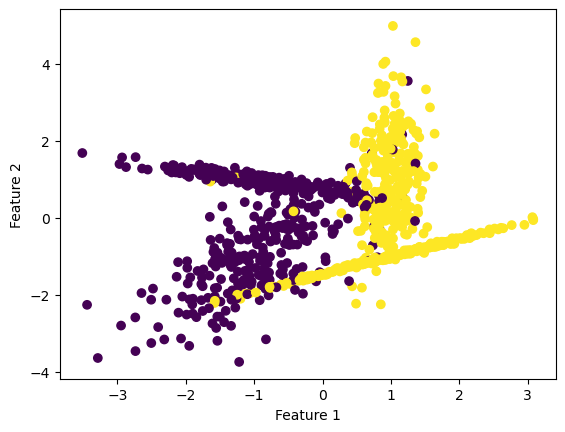

In [6]:
#Creating classification dataset and plotting it
X,y = make_classification(n_samples=1000,n_features=2,n_informative=2,n_redundant=0,n_classes=2,n_clusters_per_class=2)

plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

### Question 3:
Make a clustering dataset with 2 features and 4 clusters.

Text(0, 0.5, 'Feature 2')

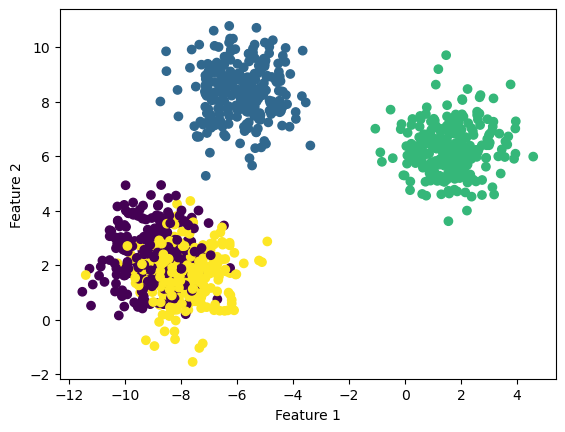

In [7]:
#Making clusters of sample data
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=1000,n_features=2,centers=4)
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


## Question 4
Go to the website https://www.worldometers.info/coronavirus/ and scrape the table containing covid-19 infection and deaths data using requests and BeautifulSoup.  Convert the table to a Pandas dataframe with the following columns : Country, Continent, Population, TotalCases, NewCases, TotalDeaths, NewDeaths,TotalRecovered, NewRecovered,  ActiveCases.

*(<b>Optional Challenge :</b> Change the data type of the Columns (Population ... till ActiveCases) to integer. For that you need to remove the commas and plus signs. You may need to use df.apply() and pd.to_numeric() . Take care of the values which are empty strings.)

In [8]:
#Reading the html link in Python file
import requests as req
link = 'https://www.worldometers.info/coronavirus/'
web_object = req.get(link)

#Parsing the html file
from bs4 import BeautifulSoup
parse = BeautifulSoup(web_object.text, 'html.parser')

#Reading the table from parsed html file
table = parse.find('table', id='main_table_countries_today')
print(table)

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br>Other</br></th>
<th width="20">Total<br>Cases</br></th>
<th width="30">New<br>Cases</br></th>
<th width="30">Total<br>Deaths</br></th>
<th width="30">New<br>Deaths</br></th>
<th width="30">Total<br>Recovered</br></th>
<th width="30">New<br>Recovered</br></th>
<th width="30">Active<br>Cases</br></th>
<th width="30">Serious,<br>Critical</br></th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="

In [9]:
#Converting the table into Pandas DataFrame
import pandas as pd
headers = []
first_row = table.find('tr');

for i in first_row.find_all('th'):
    title = i.text
    headers.append(title)

print(headers)

pytable = pd.DataFrame(columns = headers)
for i in table.find_all('tr')[1:]:
    row_data = i.find_all('td')
    row = [i.text for i in row_data]
    length = len(pytable)
    pytable.loc[length]=row

#Deleting unwanted columns
pytable.drop(pytable.columns[[0,9,10,11,12,13,16,17,18,19,20,21]],axis=1,inplace=True)

pytable1=pytable.loc[8:238]
pytable1

['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/\n1M pop\n', 'Population', 'Continent', '1 Caseevery X ppl', '1 Deathevery X ppl', '1 Testevery X ppl', 'New Cases/1M pop', 'New Deaths/1M pop', 'Active Cases/1M pop']


,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Population,Continent
8,USA,"107,042,460",,"1,164,345",,"105,073,304",,"804,811","334,805,269",North America
9,India,"44,986,934",,"531,839",,"44,447,472",,"7,623","1,406,631,776",Asia
10,France,"40,054,863",,"167,052",,"39,824,288","+1,098","63,523","65,584,518",Europe
11,Germany,"38,422,054",,"173,995",,"38,229,300","+2,100","18,759","83,883,596",Europe
12,Brazil,"37,553,337",,"702,421",,"36,249,161",,"601,755","215,353,593",South America
...,...,...,...,...,...,...,...,...,...,...
234,Vatican City,29,,,,29,,0,799,Europe
235,Western Sahara,10,,1,,9,,0,"626,161",Africa
236,MS Zaandam,9,,2,,7,,0,,
237,Tokelau,5,,,,,,5,"1,378",Australia/Oceania


# Question 5

Generate an imbalanced classification dataset using sklearn of 1000 samples with 2 features, 2 classes and 1 cluster per class. Plot the data. One of the class should contain only 5% of the total samples. Confirm this either using numpy or Counter. Plot the data.

Now oversample the minority class to 5 times its initial size using SMOTE. Verify the number. Plot the data.

Now undersample the majority class to 3 times the size of minority class using RandomUnderSampler. Verify the number. Plot the data.

Reference : Last markdown cell of the examples.

Original Data: Counter({0: 945, 1: 55})


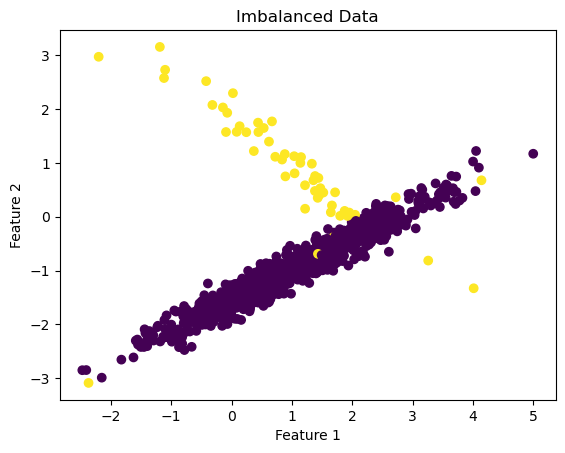

After Oversampling: Counter({0: 945, 1: 275})


<function matplotlib.pyplot.show(close=None, block=None)>

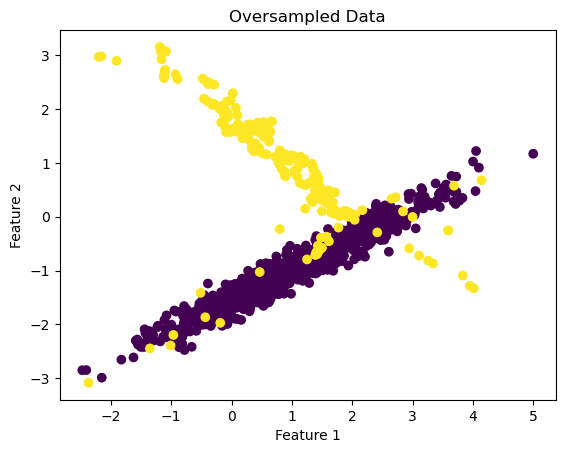

In [10]:
#Importing required libraries and functions
from numpy import where
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Creating classification of datasets
X,y = make_classification(n_samples=1000,n_features=2,n_informative=2,n_redundant=0,n_classes=2,n_clusters_per_class=1, weights=[0.95,0.05],random_state=42)
counter = Counter(y)
print("Original Data:",counter)

#Plotting imbalanced data
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Imbalanced Data")
plt.show()

#Oversampling the minority data
oversample = SMOTE(sampling_strategy=0.292)
X_os, y_os = oversample.fit_resample(X, y)
counter = Counter(y_os)
print("After Oversampling:",counter)

#Plotting oversampled data
plt.scatter(X_os[:,0],X_os[:,1],c=y_os)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Oversampled Data")
plt.show


After Undersampling: Counter({0: 833, 1: 275})


<function matplotlib.pyplot.show(close=None, block=None)>

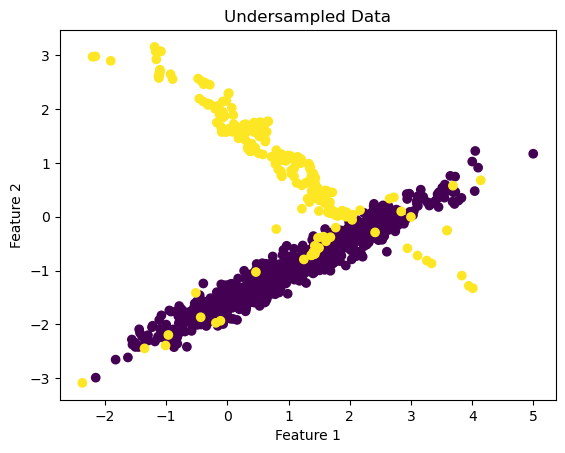

In [11]:
#Undersampling the majority data
undersample = RandomUnderSampler(sampling_strategy=0.33)
X_us,y_us = undersample.fit_resample(X_os,y_os)
counter = Counter(y_us)
print("After Undersampling:",counter)

#Plotting the new data
plt.scatter(X_us[:,0],X_us[:,1],c=y_us)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Undersampled Data")
plt.show

##Question 6

Write a Python code to perform data preprocessing on a dataset using the scikit-learn library. Follow the instructions below:

 * Load the dataset using the scikit-learn `load_iris` function.
 * Assign the feature data to a variable named `X` and the target data to a variable named `y`.
 * Create a pandas DataFrame called `df` using `X` as the data and the feature names obtained from the dataset.
 * Display the first 5 rows of the DataFrame `df`.
 *  Check if there are any missing values in the DataFrame and handle them accordingly.
 * Split the data into training and testing sets using the `train_test_split` function from scikit-learn. Assign 70% of the data to the training set and the remaining 30% to the testing set.
 * Print the dimensions of the training set and testing set respectively.
 *  Standardize the feature data in the training set using the `StandardScaler` from scikit-learn.
 *  Apply the same scaling transformation on the testing set.
 * Print the first 5 rows of the standardized training set.

In [17]:
#Importing required libraries and functions
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Reading the Iris dataset
iris = load_iris()
feature = iris.feature_names
X = iris.data
y = iris.target

#Converting Iris dataset into Pandas DataFrame
df = pd.DataFrame(X,columns=feature)
df.head()

#Describing the whole table and checking for non-null values.
df.info()
#All rows contain data.

#Data Splitting for training and testing
X_train, X_test, y_train, y_test = train_test_split(df,y,train_size=0.7,test_size=0.3,random_state=42)

#Printing dimensions of the split data
print("Dimension of training data: ",X_train.shape)
print("Dimension of test data: ",X_test.shape)

#Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)

print(X_train[:5])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
Dimension of training data:  (105, 4)
Dimension of test data:  (45, 4)
[[-0.4134164  -1.46200287 -0.09951105 -0.32339776]
 [ 0.55122187 -0.50256349  0.71770262  0.35303182]
 [ 0.67180165  0.21701605  0.95119225  0.75888956]
 [ 0.91296121 -0.02284379  0.30909579  0.2177459 ]
 [ 1.63643991  1.41631528  1.30142668  1.70589097]]
